# Evaluation examples

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%autoreload 2
simulation = Simulator(n_nodes = 50, n_edges = 10, n_clusters = 5, seed = 12343, sample_size = 100)
cluster_dag = simulation.run()

2023-07-28 19:31:22,763 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [3]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X21', 'X16', 'X17', 'X3', 'X6'], 'C2': ['X7', 'X10', 'X11', 'X12', 'X13', 'X37', 'X32', 'X36', 'X4', 'X19', 'X23', 'X27'], 'C3': ['X30', 'X29', 'X28'], 'C4': ['X2', 'X40', 'X26', 'X39', 'X35', 'X31'], 'C5': ['X14', 'X18', 'X38', 'X24', 'X34', 'X15', 'X22', 'X33', 'X5', 'X1', 'X20', 'X25', 'X8', 'X9']}
[('C1', 'C5'), ('C1', 'C4'), ('C4', 'C5'), ('C2', 'C5'), ('C2', 'C4'), ('C1', 'C3')]


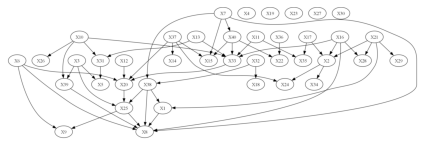

In [4]:
cluster_dag.true_dag.draw_pydot_graph()

In [5]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [6]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

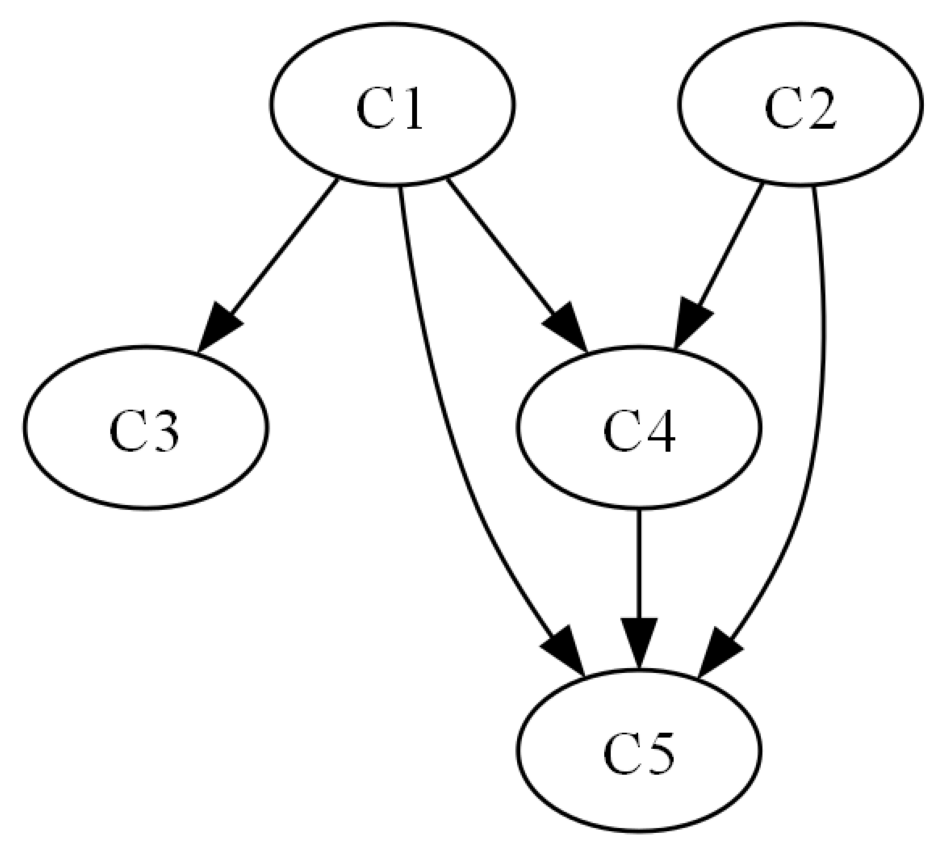

In [7]:
cluster_dag.draw_cluster_graph()

In [8]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph = cluster_pc.run()

In:     C5, Depth=0, working on node 37: 100%|██████████| 14/14 [00:00<00:00, 609.00it/s, duration: 0.28sec]


Duration of algorithm was 5.06sec


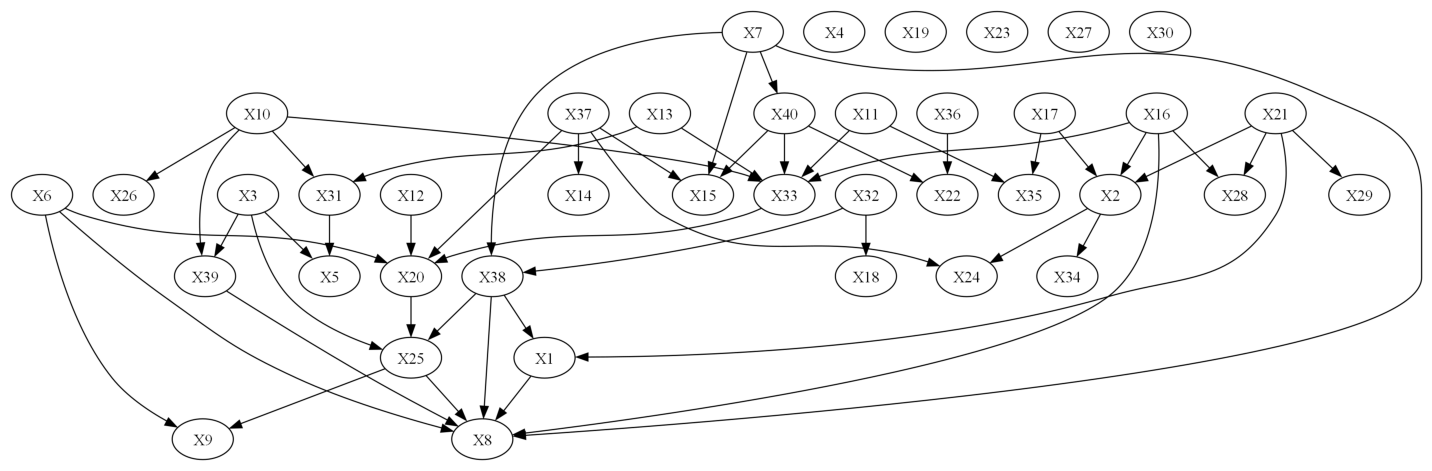

In [9]:
cluster_dag.true_dag.draw_pydot_graph()

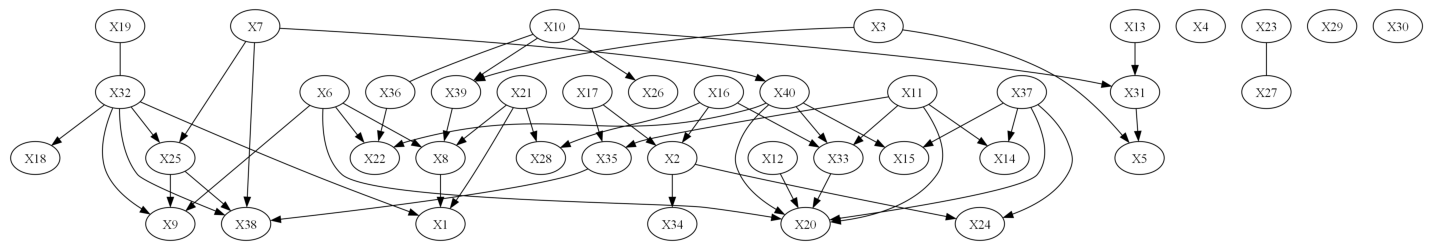

In [10]:
est_graph.draw_pydot_graph()

In [11]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 39, 'false_positive': 13, 'false_negative': 12, 'true_negative': 716, 'precision': 0.75, 'recall': 0.7647058823529411}
Arrow confusion:  {'true_positive': 37.0, 'false_positive': 12.0, 'false_negative': 14.0, 'true_negative': 1537.0, 'precision': 0.7551020408163265, 'recall': 0.7254901960784313, 'true_positive_ce': 37.0, 'false_positive_ce': 2.0, 'false_negative_ce': 2.0, 'true_negative_ce': 1559.0, 'precision_ce': 0.9487179487179487, 'recall_ce': 0.9487179487179487}
SHD:  27


In [12]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.05, verbose=False)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)

Depth=3, working on node 39: 100%|██████████| 40/40 [00:00<00:00, 1483.86it/s]


Max depth: 3
Adjacency confusion:  {'true_positive': 33, 'false_positive': 3, 'false_negative': 18, 'true_negative': 726, 'precision': 0.9166666666666666, 'recall': 0.6470588235294118}
Arrow confusion:  {'true_positive': 18.0, 'false_positive': 6.0, 'false_negative': 33.0, 'true_negative': 1543.0, 'precision': 0.75, 'recall': 0.35294117647058826, 'true_positive_ce': 18.0, 'false_positive_ce': 3.0, 'false_negative_ce': 15.0, 'true_negative_ce': 1564.0, 'precision_ce': 0.8571428571428571, 'recall_ce': 0.5454545454545454}
SHD:  24


In [13]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

False
False
False


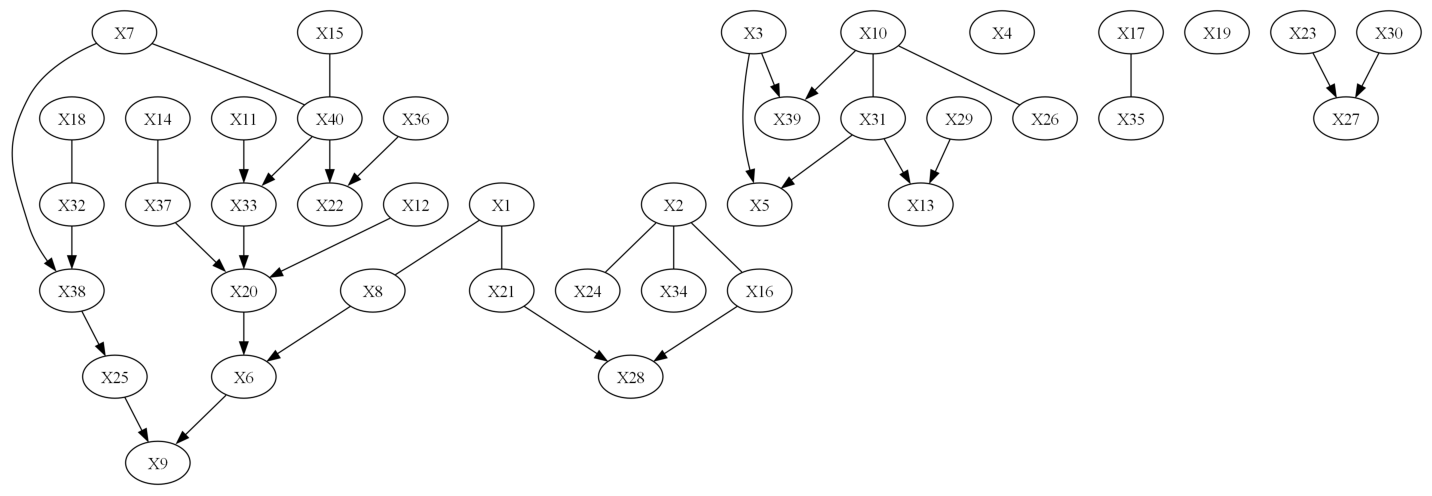

In [14]:
causallearn_cg.draw_pydot_graph()

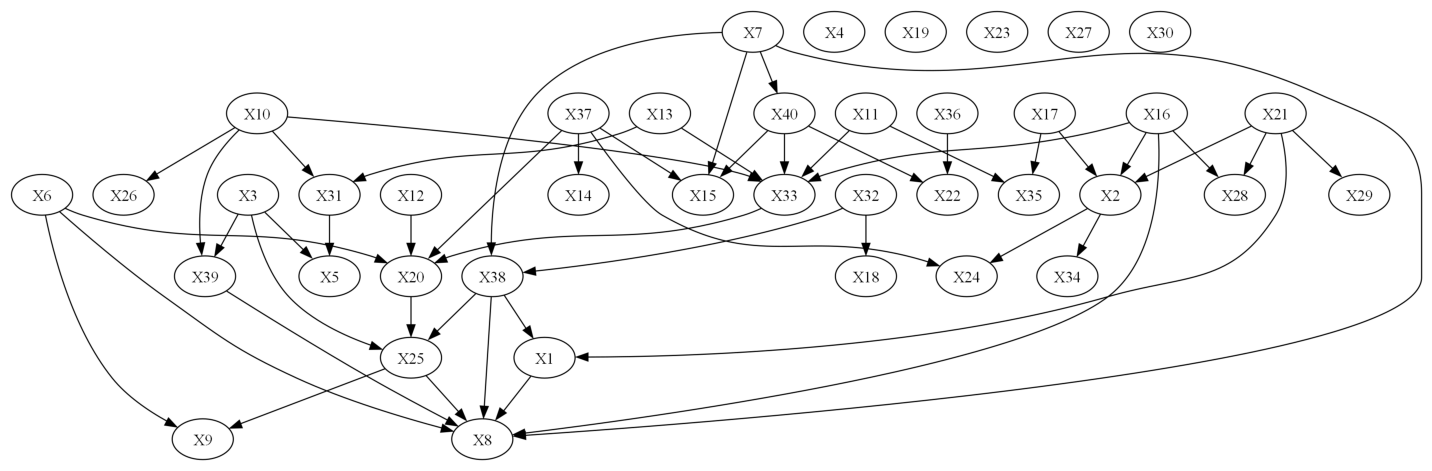

In [15]:
cluster_dag.true_dag.draw_pydot_graph()

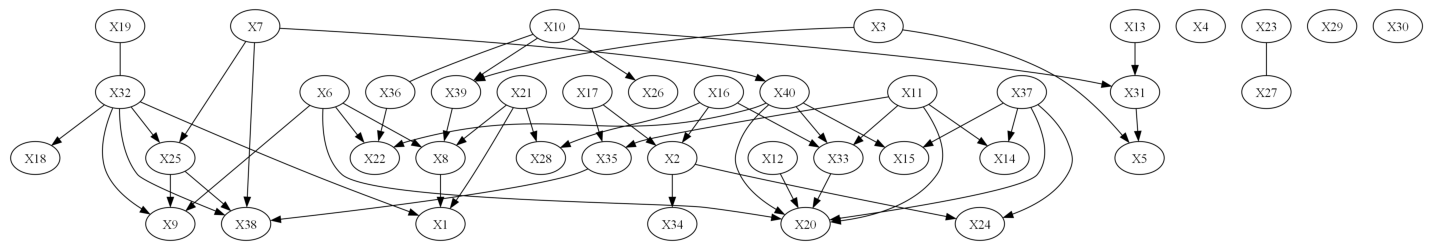

In [16]:
est_graph.draw_pydot_graph()